In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


# Set up the same example as in two-layer model but using the LayeredModel subclass

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

delta = .25

H1 = 500.        # layer 1 thickness  [m]
H2 = 2000.0      # layer 2 

U1 = 0.025          # layer 1 zonal velocity [m/s]
U2 = 0.0         # layer 2

dt = 7200.0
year = 24*60*60*360.
m = pyqg.LayeredModel(nz=2,U=np.array([U1,U2]),V=np.array([0.,0.]),H=np.array([500.,2000.]),
                      delta=delta,tmax=10*year, twrite=10000, tavestart=5*year)

2015-10-18 20:54:30,787 - pyqg.model - INFO -  Logger initialized
INFO:pyqg.model: Logger initialized
2015-10-18 20:54:30,848 - pyqg.model - INFO -  Kernel initialized
INFO:pyqg.model: Kernel initialized


In [3]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

In [4]:
m.run()

2015-10-18 20:54:41,033 - pyqg.model - INFO -  Step: 10000, Time: 7.200000e+07, KE: 6.822053e-05, CFL: 0.033001
INFO:pyqg.model: Step: 10000, Time: 7.200000e+07, KE: 6.822053e-05, CFL: 0.033001
2015-10-18 20:54:50,853 - pyqg.model - INFO -  Step: 20000, Time: 1.440000e+08, KE: 4.880284e-04, CFL: 0.099285
INFO:pyqg.model: Step: 20000, Time: 1.440000e+08, KE: 4.880284e-04, CFL: 0.099285
2015-10-18 20:55:00,515 - pyqg.model - INFO -  Step: 30000, Time: 2.160000e+08, KE: 4.398468e-04, CFL: 0.101468
INFO:pyqg.model: Step: 30000, Time: 2.160000e+08, KE: 4.398468e-04, CFL: 0.101468
2015-10-18 20:55:10,443 - pyqg.model - INFO -  Step: 40000, Time: 2.880000e+08, KE: 4.602823e-04, CFL: 0.093537
INFO:pyqg.model: Step: 40000, Time: 2.880000e+08, KE: 4.602823e-04, CFL: 0.093537


## Visualize a snapshot in the upper layer

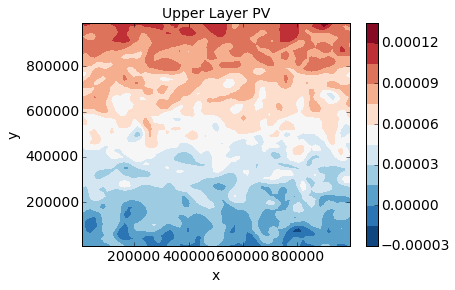

In [5]:
q_upper = m.q[0] + m.Qy[0]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

## Plot KE spectra

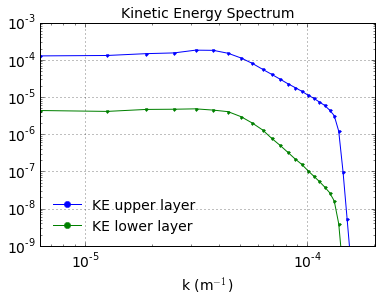

In [16]:
kespec_u = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_l = m.get_diagnostic('KEspec')[1].sum(axis=0)
plt.loglog( m.kk, kespec_u, '.-' )
plt.loglog( m.kk, kespec_l, '.-' )

plt.legend(['KE upper layer','KE lower layer','APE'], loc='lower left')
plt.ylim([1e-9,1e-3]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

## Plot diagnostics

In [7]:
m.describe_diagnostics()

NAME       | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral divergence of flux of available potential energy
APEgenspec | the rate of generation of available potential energy  
APEspec    | available potential energy spectrum                   
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral divergence of flux of kinetic energy         
KEspec     | level-wise kinetic energy spectrum                    
entspec    | barotropic enstrophy spectrum                         
q          | QGPV                                                  
u          | zonal velocity                                        
v          | meridional velocity                                   
vq         | meridional PV flux                                    


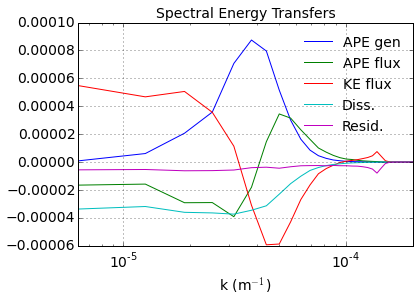

In [8]:
ebud = [ m.get_diagnostic('APEgenspec').sum(axis=0),
         m.get_diagnostic('APEflux').sum(axis=0),
         m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']
[plt.semilogx(m.kk, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');